In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#loading the dataset
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#encoding the categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Surname'] = le.fit_transform(df['Surname'])
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

In [4]:
#removing attributes which don't contribute to the output variable
df.drop(['RowNumber', 'CustomerId'], axis = 1, inplace = True)

<Axes: >

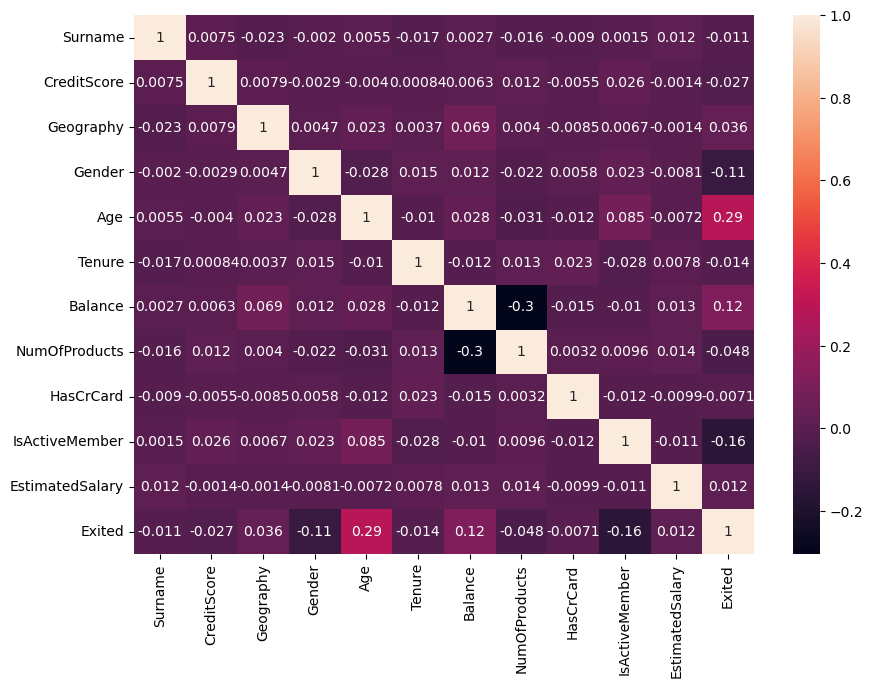

In [5]:
plt.figure(figsize = (10, 7))
sns.heatmap(df.corr(), annot = True)

In [6]:
#normalizing the data and splitting into training and testing
X = df.drop(['Exited'], axis = 1)
y = df['Exited']
X = (X - X.mean()) / (X.max() - X.min())
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

In [16]:
#building the neural network
def simple_nn(inputs, numUnits = 128):
    h1 = tf.keras.layers.Dense(numUnits, activation = 'relu')(inputs)
    h2 = tf.keras.layers.Dense(numUnits / 2, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.1))(h1)
    h3 = tf.keras.layers.Dense(numUnits / 4, activation = 'relu', kernel_regularizer = keras.regularizers.l2(0.1))(h2)
    output = tf.keras.layers.Dense(1, activation = 'sigmoid')(h3)
    model = tf.keras.Model(inputs = [inputs], outputs = [output])
    return model

## 1. Learning Rate = 0.1, Epochs = 10

In [17]:
inputLayer = tf.keras.layers.Input((11))
#lr = 0.1, epochs = 10
model1 = simple_nn(inputLayer)
model1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1), loss = 'binary_crossentropy', metrics = ['accuracy', 'Precision', 'Recall'])

In [18]:
history1 = model1.fit(X_train, y_train, epochs = 10, validation_split = 0.15)

Epoch 1/10
226/226 [==============================] - 6s 24ms/step - loss: 0.7939 - accuracy: 0.7909 - precision: 0.2742 - recall: 0.0115 - val_loss: 0.5128 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
226/226 [==============================] - 5s 23ms/step - loss: 0.5251 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.7255 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
226/226 [==============================] - 5s 22ms/step - loss: 0.5320 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5178 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/10
226/226 [==============================] - 5s 21ms/step - loss: 0.5270 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5385 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
226/226 [========================

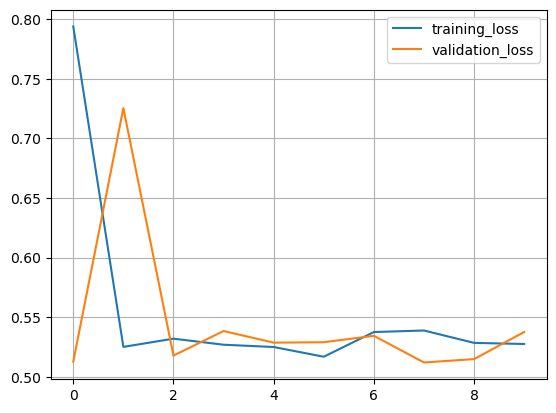

In [19]:
plt.plot(history1.history['loss'], label = 'training_loss')
plt.plot(history1.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.grid(True)

In [20]:
#the validation loss seems more than training loss, so there seems to be overfitting

## 2. Learning Rate = 0.1, Epochs = 20

In [21]:
inputLayer = tf.keras.layers.Input((11))
#lr = 0.1, epochs = 20
model2 = simple_nn(inputLayer)
model2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1), loss = 'binary_crossentropy', metrics = ['accuracy', 'Precision', 'Recall'])

In [22]:
history1 = model2.fit(X_train, y_train, epochs = 20, validation_split = 0.15)

Epoch 1/20
226/226 [==============================] - 6s 23ms/step - loss: 0.7923 - accuracy: 0.7917 - precision: 0.1765 - recall: 0.0040 - val_loss: 0.5436 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
226/226 [==============================] - 5s 22ms/step - loss: 0.5456 - accuracy: 0.7922 - precision: 0.2188 - recall: 0.0047 - val_loss: 0.5183 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
226/226 [==============================] - 5s 22ms/step - loss: 0.5332 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5188 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
226/226 [==============================] - 5s 21ms/step - loss: 0.5330 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5206 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/20
226/226 [==============================] 

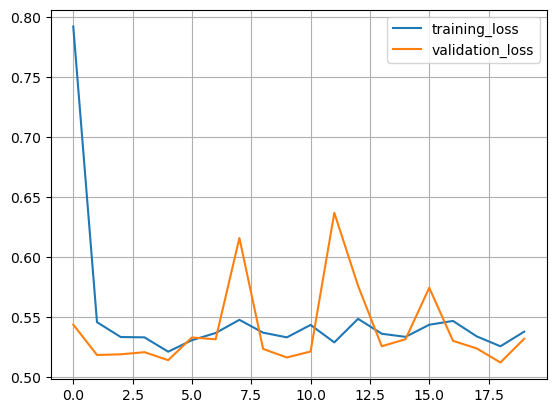

In [23]:
plt.plot(history1.history['loss'], label = 'training_loss')
plt.plot(history1.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.grid(True)

In [24]:
#The validation loss seems to be fluctuating, lets run more epochs and observe

## 3.  Learning Rate = 0.1, Epochs = 30

In [25]:
inputLayer = tf.keras.layers.Input((11))
#lr = 0.1, epochs = 30
model3 = simple_nn(inputLayer)
model3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1), loss = 'binary_crossentropy', metrics = ['accuracy', 'Precision', 'Recall'])

In [26]:
#model already training for 10 epochs , so train for 10 more for 20 epochs
history1 = model3.fit(X_train, y_train, epochs = 30, validation_split = 0.15)

Epoch 1/30
226/226 [==============================] - 8s 26ms/step - loss: 0.8618 - accuracy: 0.7827 - precision: 0.2857 - recall: 0.0391 - val_loss: 0.5912 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/30
226/226 [==============================] - 5s 24ms/step - loss: 0.5383 - accuracy: 0.7913 - precision: 0.1429 - recall: 0.0034 - val_loss: 0.5077 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/30
226/226 [==============================] - 5s 24ms/step - loss: 0.5320 - accuracy: 0.7892 - precision: 0.1875 - recall: 0.0081 - val_loss: 0.6445 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/30
226/226 [==============================] - 5s 24ms/step - loss: 0.5292 - accuracy: 0.7947 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5180 - val_accuracy: 0.7953 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/30
226/226 [==============================] - 5s 22m

KeyboardInterrupt: 

In [ ]:
plt.plot(history1.history['loss'], label = 'training_loss')
plt.plot(history1.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.grid(True)

In [ ]:
#Validation loss seems to be fluctuating alot, lets try with different learning rate

## 4. Learning Rate = 0.01, Epochs = 10

In [ ]:
#lr = 0.01, epochs = 10
model4 = simple_nn(inputLayer)
model4.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), loss = 'binary_crossentropy', metrics = ['accuracy', 'Precision', 'Recall'])
history2 = model4.fit(X_train, y_train, epochs = 10, validation_split = 0.15)

In [ ]:
plt.plot(history2.history['loss'], label = 'training_loss')
plt.plot(history2.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.grid(True)

## 5. Learning Rate = 0.01, Epochs = 20

In [ ]:
#lr = 0.01, epochs = 20
model5 = simple_nn(inputLayer)
model5.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), loss = 'binary_crossentropy', metrics = ['accuracy', 'Precision', 'Recall'])
history2 = model5.fit(X_train, y_train, epochs = 20, validation_split = 0.15)

In [ ]:
plt.plot(history2.history['loss'], label = 'training_loss')
plt.plot(history2.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.grid(True)

## 6. Learning Rate = 0.01, Epochs = 30

In [ ]:
#lr = 0.01, epochs = 30
model6 = simple_nn(inputLayer)
model6.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), loss = 'binary_crossentropy', metrics = ['accuracy', 'Precision', 'Recall'])
history2 = model6.fit(X_train, y_train, epochs = 30, validation_split = 0.15)

In [ ]:
plt.plot(history2.history['loss'], label = 'training_loss')
plt.plot(history2.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.grid(True)

## 7. Learning Rate = 0.001, Epochs = 10

In [ ]:
#lr = 0.001, epochs = 10
model7 = simple_nn(inputLayer)
model7.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy', 'Precision', 'Recall'])
history3 = model7.fit(X_train, y_train, epochs = 10, validation_split = 0.15)

In [ ]:
plt.plot(history3.history['loss'], label = 'training_loss')
plt.plot(history3.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.grid(True)

## 8. Learning Rate = 0.001, Epochs = 20

In [ ]:
#lr = 0.001, epochs = 20
model8 = simple_nn(inputLayer)
model8.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy', 'Precision', 'Recall'])
history3 = model8.fit(X_train, y_train, epochs = 20, validation_split = 0.15)

In [ ]:
plt.plot(history3.history['loss'], label = 'training_loss')
plt.plot(history3.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.grid(True)

## 9. Learning Rate = 0.001, Epochs = 30

In [ ]:
#lr = 0.001, epochs = 20
model9 = simple_nn(inputLayer)
model9.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy', 'Precision', 'Recall'])
history3 = model9.fit(X_train, y_train, epochs = 30, validation_split = 0.15)

In [ ]:
plt.plot(history3.history['loss'], label = 'training_loss')
plt.plot(history3.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.grid(True)